In [5]:
# import the required packages 

import itertools
import numpy as np
import pandas as pd
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from collections import defaultdict

import pickle

## OBJECTIEVE 1: Identify the Popular Film Genres in the industry
   > Overview of the most watched movies

   > Measure using popularity
   
   > Which films have more rating according to average rating

In [2]:
# upload the data
merged_data = pd.read_csv("cleaned_merged_data.csv")
merged_data.head(2)

,original_language,original_title,popularity,release_date,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788,146.0,"Adventure,Fantasy,Mystery",7.7,425530
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,98.0,"Action,Adventure,Animation",8.1,611299


In [3]:
# Create an empty list to store individual genres
genres_list = []

# Split genres in each row and add them directly to genres_list
for genres in merged_data["genres"]:
    genres_list.extend(genres.split(','))

# Count the number of films by genre
genres_sum = Counter(genres_list)

# Calculate the total number of genre entries for percentage calculation
total_genres = sum(genres_sum.values())

# Create a DataFrame from the Counter, including percentage calculation
genre_df = pd.DataFrame(genres_sum.items(), columns=["Genre", "Count"])
genre_df["Percentage"] = (genre_df["Count"] / total_genres) * 100

# Sort the DataFrame by 'Count' in descending order
genre_df = genre_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Display the table
print(genre_df.head(10))
print(" ")
print("The Top five top watched movies are Drama, Comedy, Documentary, Thriller and Horror")

         Genre  Count  Percentage
0        Drama   7252   21.745127
1       Comedy   3799   11.391304
2  Documentary   3142    9.421289
3     Thriller   3106    9.313343
4       Horror   2977    8.926537
5       Action   2006    6.014993
6      Romance   1596    4.785607
7        Crime   1545    4.632684
8    Adventure   1217    3.649175
9      Mystery   1091    3.271364
 
The Top five top watched movies are Drama, Comedy, Documentary, Thriller and Horror


In [11]:
# Sample structure for merged_data: A DataFrame containing "genres" and "popularity" columns
# merged_data = pd.DataFrame({'genres': [...], 'popularity': [...]})

# Create a dictionary to store popularity totals and counts by genre
genre_popularity = defaultdict(lambda: {'total_popularity': 0, 'count': 0})

# Iterate through each row in the dataset
for index, row in merged_data.iterrows():
    genres = row["genres"].split(',')
    popularity = row["popularity"]
    for genre in genres:
        genre_popularity[genre]['total_popularity'] += popularity
        genre_popularity[genre]['count'] += 1

# Calculate average popularity for each genre
average_popularity = {genre: data['total_popularity'] / data['count'] for genre, data in genre_popularity.items()}

# Convert the average popularity dictionary to a DataFrame for easy plotting
genre_popularity_df = pd.DataFrame(list(average_popularity.items()), columns=["Genre", "Average Popularity"])

# Sort the DataFrame by "Average Popularity" in descending order
genre_popularity_df = genre_popularity_df.sort_values(by="Average Popularity", ascending=False)

print("The most popular movies are Adventure, Animation, Action, Fantasy and Crime")
print (" ")
print(genre_popularity_df)



The most popular movies are Adventure, Animation, Action, Fantasy and Crime
 
          Genre  Average Popularity
0     Adventure            8.215844
4     Animation            7.729220
3        Action            6.996766
1       Fantasy            6.559962
10        Crime            5.545509
5        Sci-Fi            5.537268
2       Mystery            4.887088
7        Comedy            4.423797
14      Romance            4.359005
15    Biography            4.250948
19          War            4.249191
9      Thriller            4.215683
12        Drama            4.164361
18      Western            3.863434
11       Horror            3.583742
6        Family            3.533843
16      History            3.515650
13        Music            3.468514
20        Sport            3.365236
8       Musical            3.247488
17  Documentary            1.811695
21         News            1.444415
22   Reality-TV            1.140667
23        Adult            0.793000


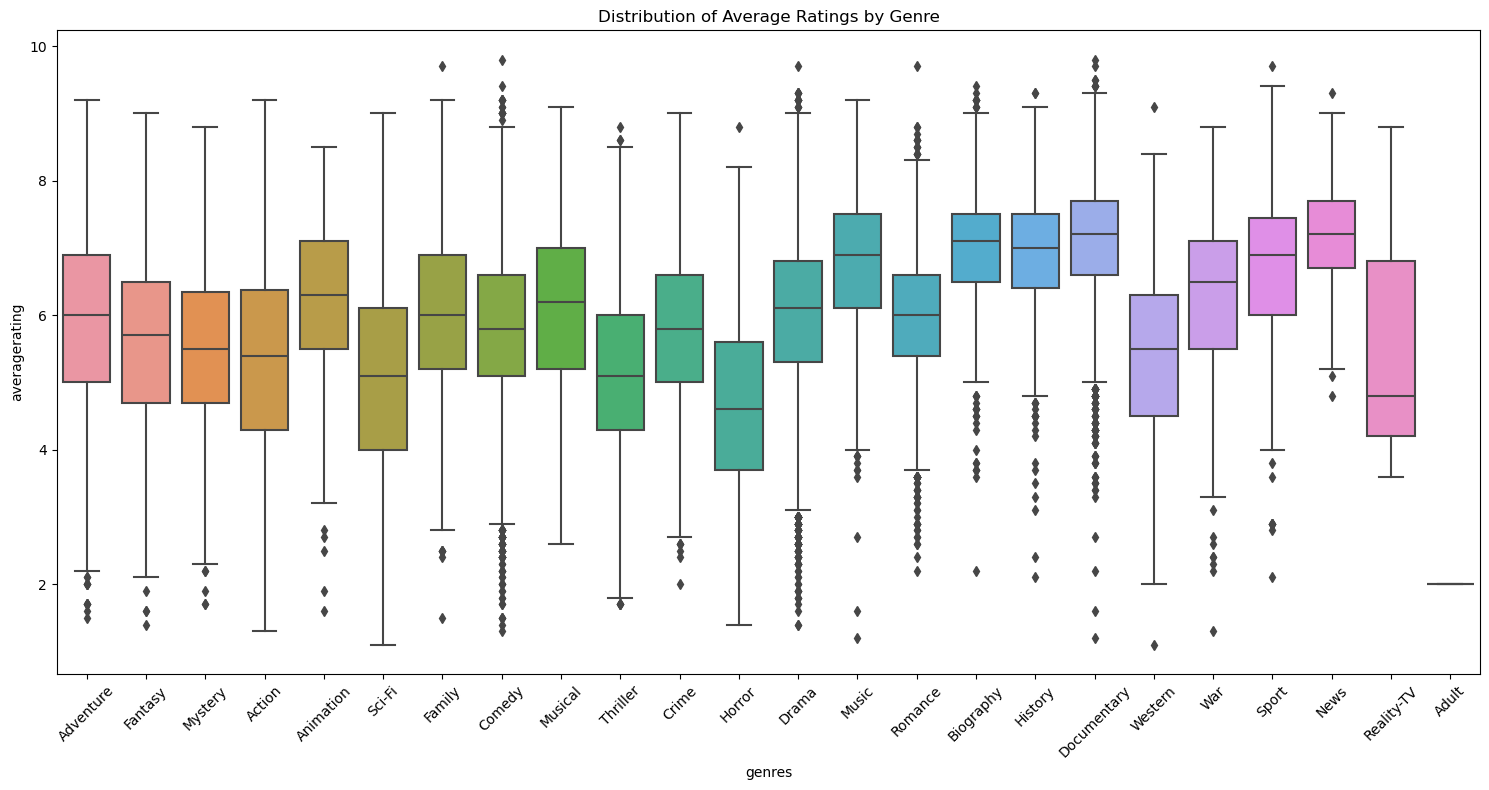

In [14]:
# Split genres and explode to analyze each genre separately
df_exploded = merged_data.assign(genres=merged_data['genres'].str.split(',')).explode('genres')

# Create plots for averagerating distribution by genre
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_exploded, x='genres', y='averagerating')
plt.xticks(rotation=45)
plt.title('Distribution of Average Ratings by Genre')
plt.tight_layout()
plt.show()

#Do we remove the outliers? 